<a href="https://colab.research.google.com/github/Bablu0420/TextMinning/blob/main/Text_Mining_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
## Perform sentimental analysis:
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

## 1. Import Libraries

In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## 2. Multi-page web-scraping

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

### Looping through multiple pages

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

### Save results to a Dataframe, then export as CSV

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,Reviewed in India on 2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",Reviewed in India on 5 March 2024
3,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",Reviewed in India on 28 February 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
...,...,...,...,...
105,5.0 out of 5 stars\n.,5.0,It has a great quality and the built features ...,Reviewed in India on 22 January 2024
106,5.0 out of 5 stars\nNice,5.0,Nice product,Reviewed in India on 6 February 2024
107,"5.0 out of 5 stars\nGood , worth for money",5.0,Good product,Reviewed in India on 10 February 2024
108,5.0 out of 5 stars\nGOOD,5.0,GOOD ONE,Reviewed in India on 31 January 2024


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",28 February 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
5,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
6,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
7,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


In [9]:
df.to_csv("BoatSmartWatch_Review.csv")

## 3. Load Dataset

In [10]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",28 February 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
...,...,...,...,...
105,5.0 out of 5 stars\n.,5.0,It has a great quality and the built features ...,22 January 2024
106,5.0 out of 5 stars\nNice,5.0,Nice product,6 February 2024
107,"5.0 out of 5 stars\nGood , worth for money",5.0,Good product,10 February 2024
108,5.0 out of 5 stars\nGOOD,5.0,GOOD ONE,31 January 2024


## 4. Data Exploration

In [11]:
reviews.Rating.describe()

count    110.000000
mean       4.181818
std        0.637970
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       107 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [13]:
reviews.isna().sum()

Title          0
Rating         0
Review         3
Review_Date    0
dtype: int64

In [14]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",28 February 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022


## 5. Data Visualization

### Date vs Review Count

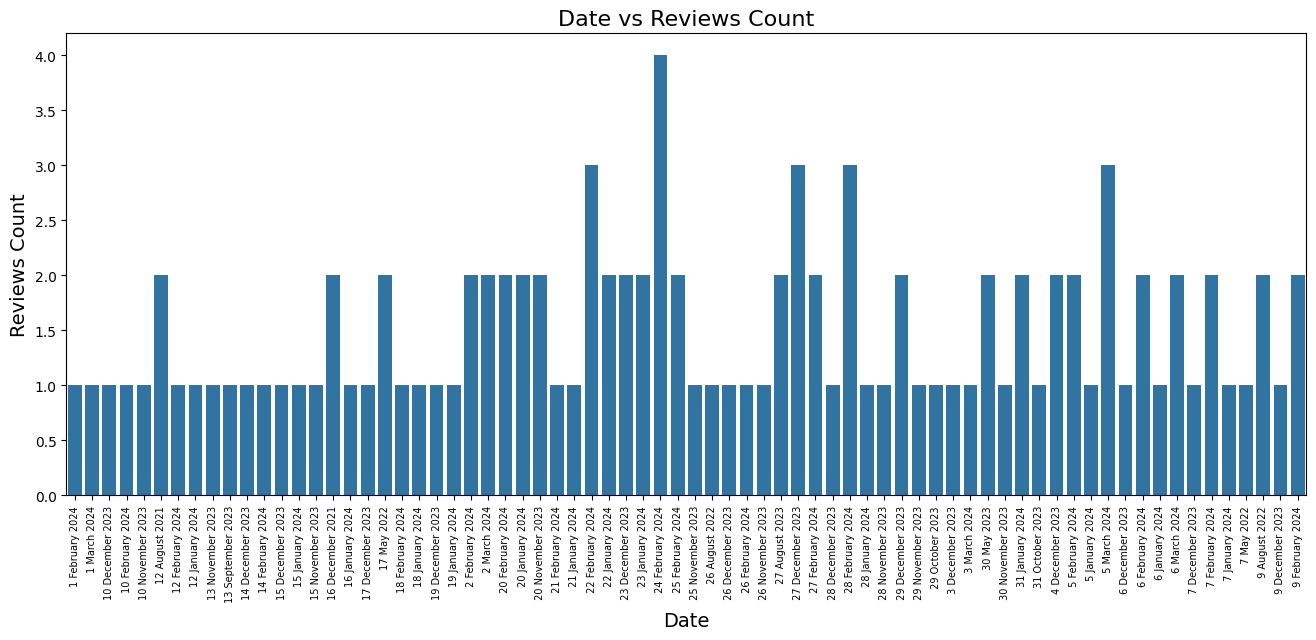

In [15]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

### Percentage of Ratings

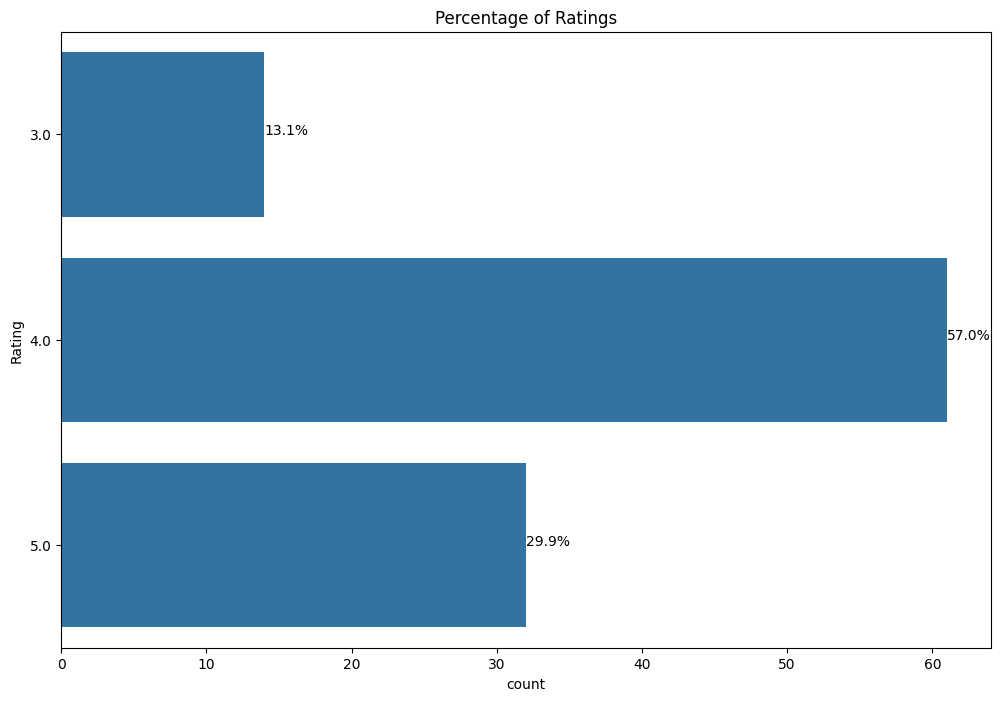

In [16]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

## 6. BasicText Preprocessing for Sentiment Analysis

### Spelling Correction

In [17]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I am using smart watch for the first time. Mod...
1    His smart (model Coat extend plus) watch is sa...
2    Very good ,nice and worth for money, super pro...
3    Easy to operate,good looks,good design,light w...
4    Shipping the parts mostly covered in other rev...
Name: Review, dtype: object

In [18]:
boat_review = reviews[['Review']]
boat_review

,Review
0,I am using smart watch for the first time. Mod...
1,This smart (model Boat extend plus) watch is f...
2,"Very good ,nice and worth for money, super pro..."
3,"Easy to operate,good looks,good design,light w..."
4,Skipping the parts mostly covered in other rev...
...,...
105,It has a great quality and the built features ...
106,Nice product
107,Good product
108,GOOD ONE


### Resetting index

In [19]:
boat_review.reset_index(drop=True, inplace=True)

In [21]:
!pip install nltk
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

### Lemmatizer

In [24]:
!pip install nltk
import nltk
nltk.download('wordnet')
try:
    lemmatizer = WordNetLemmatizer()
except LookupError as e:
    print(e)
    import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
import numpy as np
boat_review.info()
boat_review.info()
print(len(corpus))
if len(corpus) == 0:
    corpus = boat_review["Review"]
    dataframe = pd.DataFrame({"Clean_Reviews": corpus, "Uncleaned_Reviews": boat_review["Review"]})
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  107 non-null    object
dtypes: object(1)
memory usage: 984.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  107 non-null    object
dtypes: object(1)
memory usage: 984.0+ bytes
0


,Clean_Reviews,Uncleaned_Reviews
0,i using smart watch first time. model xtend bo...,i using smart watch first time. model xtend bo...
1,this smart (model boat extend plus) watch func...,this smart (model boat extend plus) watch func...
2,"very good ,nice worth money, super product","very good ,nice worth money, super product"
3,"easy operate,good looks,good design,light weig...","easy operate,good looks,good design,light weig..."
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...


## 7. Text Pre-processing Techniques

### A. Removing '@names'

In [30]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [31]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,i using smart watch first time. model xtend bo...,i using smart watch first time. model xtend bo...
1,this smart (model boat extend plus) watch func...,this smart (model boat extend plus) watch func...
2,"very good ,nice worth money, super product","very good ,nice worth money, super product"
3,"easy operate,good looks,good design,light weig...","easy operate,good looks,good design,light weig..."
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,my experience boat xtend call plus smart watch...,my experience boat xtend call plus smart watch...
6,the media could loaded. used watch month now.....,the media could loaded. used watch month now.....
7,this smart watch good value money 💰. and featu...,this smart watch good value money 💰. and featu...
8,review overviewaverage2.7the boat today launch...,review overviewaverage2.7the boat today launch...
9,pros:1. premium build quality matte finishing-...,pros:1. premium build quality matte finishing-...


### B. Removing links (http | https)

In [32]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,i using smart watch first time. model xtend bo...,i using smart watch first time. model xtend bo...
1,this smart (model boat extend plus) watch func...,this smart (model boat extend plus) watch func...
2,"very good ,nice worth money, super product","very good ,nice worth money, super product"
3,"easy operate,good looks,good design,light weig...","easy operate,good looks,good design,light weig..."
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,my experience boat xtend call plus smart watch...,my experience boat xtend call plus smart watch...
6,the media could loaded. used watch month now.....,the media could loaded. used watch month now.....
7,this smart watch good value money 💰. and featu...,this smart watch good value money 💰. and featu...
8,review overviewaverage2.7the boat today launch...,review overviewaverage2.7the boat today launch...
9,pros:1. premium build quality matte finishing-...,pros:1. premium build quality matte finishing-...


### C. Removing Review with empty text

In [33]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,i using smart watch first time. model xtend bo...,i using smart watch first time. model xtend bo...
1,this smart (model boat extend plus) watch func...,this smart (model boat extend plus) watch func...
2,"very good ,nice worth money, super product","very good ,nice worth money, super product"
3,"easy operate,good looks,good design,light weig...","easy operate,good looks,good design,light weig..."
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,my experience boat xtend call plus smart watch...,my experience boat xtend call plus smart watch...
6,the media could loaded. used watch month now.....,the media could loaded. used watch month now.....
7,this smart watch good value money 💰. and featu...,this smart watch good value money 💰. and featu...
8,review overviewaverage2.7the boat today launch...,review overviewaverage2.7the boat today launch...
9,pros:1. premium build quality matte finishing-...,pros:1. premium build quality matte finishing-...


### D. Dropping duplicate rows

In [34]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,i using smart watch first time. model xtend bo...,i using smart watch first time. model xtend bo...
1,this smart (model boat extend plus) watch func...,this smart (model boat extend plus) watch func...
2,"very good ,nice worth money, super product","very good ,nice worth money, super product"
3,"easy operate,good looks,good design,light weig...","easy operate,good looks,good design,light weig..."
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,my experience boat xtend call plus smart watch...,my experience boat xtend call plus smart watch...
6,the media could loaded. used watch month now.....,the media could loaded. used watch month now.....
7,this smart watch good value money 💰. and featu...,this smart watch good value money 💰. and featu...
8,review overviewaverage2.7the boat today launch...,review overviewaverage2.7the boat today launch...
9,pros:1. premium build quality matte finishing-...,pros:1. premium build quality matte finishing-...


### E. Function to remove emoji

In [35]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [36]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,i using smart watch first time. model xtend bo...,i using smart watch first time. model xtend bo...
1,this smart (model boat extend plus) watch func...,this smart (model boat extend plus) watch func...
2,"very good ,nice worth money, super product","very good ,nice worth money, super product"
3,"easy operate,good looks,good design,light weig...","easy operate,good looks,good design,light weig..."
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,my experience boat xtend call plus smart watch...,my experience boat xtend call plus smart watch...
6,the media could loaded. used watch month now.....,the media could loaded. used watch month now.....
7,this smart watch good value money . and featur...,this smart watch good value money 💰. and featu...
8,review overviewaverage2.7the boat today launch...,review overviewaverage2.7the boat today launch...
9,pros:1. premium build quality matte finishing-...,pros:1. premium build quality matte finishing-...


### F. Removing Stop words

In [40]:
!ls -l stop.txt
!file stop.txt
with codecs.open("/content/stop (1).txt", "r", encoding="utf-8") as s:
    stop = s.read()
    print(stop[:101])

ls: cannot access 'stop.txt': No such file or directory
stop.txt: cannot open `stop.txt' (No such file or directory)
a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [41]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [42]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time. model xtend boat...,i using smart watch first time. model xtend bo...
1,smart (model boat extend plus) watch functioni...,this smart (model boat extend plus) watch func...
2,"good ,nice worth money, super product","very good ,nice worth money, super product"
3,"easy operate,good looks,good design,light weig...","easy operate,good looks,good design,light weig..."
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,media could loaded. used watch month now.. bou...,the media could loaded. used watch month now.....
7,smart watch good value money . feature packed ...,this smart watch good value money 💰. and featu...
8,review overviewaverage2.7the boat today launch...,review overviewaverage2.7the boat today launch...
9,pros:1. premium build quality matte finishing-...,pros:1. premium build quality matte finishing-...


### G. Tokenize 'Clean_Reviews'

In [46]:
!pip install textblob
!pip install nltk
import nltk
nltk.download('punkt')
TextBlob(dataframe['Clean_Reviews'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'rs', '2300/-battery', 'beginning', 'lasted', '5', 'days', 'next', 'charge', 'lasted', '3', 'days', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps.amoled', 'display', 'good.touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'features.sleep', 'measurement', 'good', 'taking', 'day', 'time', 'naps', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'up.spo2', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument.heart', 'rate', 'measurement', 'also', 'nearer', 'instrument.stress', 'also', 'reflecting', 'nearly', 'real', 'condition.activity', 'steps', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target.sports', 'features', 'checked', 'yet', 'fully', 'checked', 'features', 'functional.water', 'resistant', 'yes'

In [47]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [using, smart, watch, first, time., model, xte...
1    [smart, (model, boat, extend, plus), watch, fu...
2         [good, ,nice, worth, money,, super, product]
3    [easy, operate,good, looks,good, design,light,...
4    [skipping, parts, mostly, covered, reviews, sp...
5    [experience, boat, xtend, call, plus, smart, w...
6    [media, could, loaded., used, watch, month, no...
7    [smart, watch, good, value, money, ., feature,...
8    [review, overviewaverage2.7the, boat, today, l...
9    [pros:1., premium, build, quality, matte, fini...
Name: Clean_Reviews, dtype: object

In [48]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,using smart watch first time. model xtend boat...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, ., model, x..."
1,smart (model boat extend plus) watch functioni...,this smart (model boat extend plus) watch func...,"[smart, (, model, boat, extend, plus, ), watch..."
2,"good ,nice worth money, super product","very good ,nice worth money, super product","[good, ,, nice, worth, money, ,, super, product]"
3,"easy operate,good looks,good design,light weig...","easy operate,good looks,good design,light weig...","[easy, operate, ,, good, looks, ,, good, desig..."
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...,"[skipping, parts, mostly, covered, reviews, sp..."
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w..."
6,media could loaded. used watch month now.. bou...,the media could loaded. used watch month now.....,"[media, could, loaded, ., used, watch, month, ..."
7,smart watch good value money . feature packed ...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, ., feature,..."
8,review overviewaverage2.7the boat today launch...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage2.7the, boat, today, l..."
9,pros:1. premium build quality matte finishing-...,pros:1. premium build quality matte finishing-...,"[pros:1., premium, build, quality, matte, fini..."


### H. Converting words to Stemmer

In [49]:
stemmer = SnowballStemmer("english")

In [50]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,use smart watch first time. model xtend boat r...
1,smart (model boat extend plus) watch function ...
2,"good ,nice worth money, super product"
3,"easi operate,good looks,good design,light weig..."
4,"skip part most cover review sponsor yt ones, a..."
...,...
102,great qualiti built featur good also waterproo...
103,nice product
104,good product
105,good one


### I. Converting words to Lemma

In [51]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,using smart watch first time. model xtend boat...
1,smart (model boat extend plus) watch functioni...
2,"good ,nice worth money, super product"
3,"easy operate,good looks,good design,light weig..."
4,skipping part mostly covered review sponsored ...
...,...
102,great quality built feature good also waterpro...
103,nice product
104,good product
105,good one


## 8. Basic Feature Extaction
### A. Applying bag of Words without N grams

In [54]:
cv = CountVectorizer()
tweetscv = cv.fit_transform(dataframe.Clean_Reviews)

In [56]:
print(cv.get_feature_names_out()[109:200])

['amazing' 'amazon' 'amoled' 'amount' 'analog' 'and' 'android' 'angle'
 'animals' 'animation' 'animations' 'anniversary' 'another' 'answer'
 'anyone' 'anyonefor' 'anything' 'anywhere' 'aod' 'apart' 'app'
 'appaccuracyaccuracy' 'appaccuracybatteryfinal' 'appearance' 'appeared'
 'apple' 'application' 'apps' 'appyou' 'around' 'arre' 'asakte' 'aside'
 'ask' 'asks' 'aspect' 'aspects' 'assistant' 'assisted' 'at' 'atm'
 'attached' 'attaching' 'attention' 'attractive' 'audio' 'audios' 'aur'
 'auto' 'available' 'avarage' 'average' 'away' 'awesome' 'back'
 'background' 'backup' 'bad' 'badges' 'band' 'bank' 'bar' 'based' 'basic'
 'bathing' 'battery' 'bazei' 'beautiful' 'bed' 'before' 'beginning'
 'being' 'believe' 'beneficial' 'benefitsnow' 'best' 'better' 'beyond'
 'bezels' 'big' 'bike' 'bip' 'birthday' 'bit' 'black' 'bloated' 'blood'
 'blue' 'bluetooth' 'boat' 'body']


In [57]:
print(cv.get_feature_names()[:100])

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [58]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [59]:
dataframe = dataframe.reset_index(drop=True)

In [60]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/107 [00:00<?, ?it/s]

In [61]:
corpus[3]

'easi oper good look good design light weight best gift girlfriend lover life partner'

### Applying Countvectorizer (Creating the Bag of Words model)

In [62]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [63]:
X.shape

(107, 1546)

In [65]:
cv.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'ago', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa'], dtype=object)

In [66]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X)
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

### C. TF-IDF Vectorizer

In [71]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/107 [00:00<?, ?it/s]

In [72]:
corpus[4]

'skip part mostli cover review sponsor yt one add irrit common sens disappoint notic sinc last day actual usag smart watch aod show date day week show hour min way configur beyond analog digit view also get turn start exercis activ like walk screen goe dark go walk calori count home screen anywher els show step count calori aggreg calori burnt exercis activ e step cal cycl show home screen separ two entri app smart enough addit quick way go start activ exercis first press side button twice select activit list menu versu swipe home screen goe utterli useless cricket score screen instead mani even use customis menu option function map provid touch wake display avail screen avail rupe yr old huwai band one press side button everi time see home screen utterli inconveni reach day night time auto configur aod twist wake provid make irrit sleep hour kept thu daili two time day task enabl disabl featur manual everi freak day kindli also note indic whatsoev aod start exercis activ start one lik

### Applying TF-IDF Vectorizer

In [73]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [74]:
X.shape

(107, 1546)

In [76]:
tfidf_v.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'ago', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa'], dtype=object)

In [77]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [81]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,would recommend go,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,yt one
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.105931,0.127658,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.000000,0.037898,0.0,0.0,0.000000,0.0,0.0,0.033899,0.0,...,0.0,0.040631,0.000000,0.000000,0.0,0.0,0.0,0.0,0.073504,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.027288,0.025452,0.0,0.0,0.023986,0.0,0.0,0.136598,0.0,...,0.0,0.027288,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.033476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
103,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
104,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
105,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


### D. Named Entity Recognition (NER)

In [82]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

"using smart watch first time. model xtend boat rtl gives smart look. easy use, 5-6 days battery backup comfortable. fully satisfied highly recommend buy it. one thing hurts, bought watch rs 1199.00 21.02.24 amazon. today, 02.03.24 price reduced rs 200.00. wish amazon/concern retailer refund rs 400.00 bought 2 watches single cart. smart (model boat extend plus) watch functioning well. worth price rs 2300/-battery, beginning lasted 5 days next charge lasted 3 days last settled one day. extensive user apps.amoled display good.touch feature good. access apps easily reachable. simple browsing features.sleep measurement good. taking day time naps. night time showing exactly went sleep woke up.spo2 measurement neaarer measurement personal digital instrument.heart rate measurement also nearer instrument.stress also reflecting nearly real condition.activity: steps showing correct. distance also good watch taking bike ride walking showing distance covered set target.sports features checked yet 

### Parts Of Speech (POS) Tagging

In [83]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [84]:
for token in doc_block[:50]:
    print(token,token.pos_)

using VERB
smart ADJ
watch NOUN
first ADJ
time NOUN
. PUNCT
model PROPN
xtend PROPN
boat PROPN
rtl NOUN
gives VERB
smart ADJ
look NOUN
. PUNCT
easy ADJ
use NOUN
, PUNCT
5 NUM
- SYM
6 NUM
days NOUN
battery NOUN
backup NOUN
comfortable ADJ
. PUNCT
fully ADV
satisfied ADJ
highly ADV
recommend NOUN
buy VERB
it PRON
. PUNCT
one NUM
thing NOUN
hurts VERB
, PUNCT
bought VERB
watch VERB
rs ADP
1199.00 NUM
21.02.24 PROPN
amazon NOUN
. PUNCT
today NOUN
, PUNCT
02.03.24 PROPN
price NOUN
reduced VERB
rs ADP
200.00 NUM


### Filtering the nouns and verbs only

In [85]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['wrist', 'put', 'rest', 'raise', 'feature', 'feature', 'enabled', 'calling', 'feature', 'speaker', 'take', 'call', 'listening', 'videos', 'walking', 'battery', 'drains', 'quickly.messages', 'see', 'light', 'functioning', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning.find', 'phone', 'beautiful.settings', 'improved', 'tune', 'measuring', 'heart', 'rate', 'placed', 'surfaces', 'body', 'check', 'volume', 'controlling', 'app', 'open', 'read', 'messages.calender', 'month', 'check', 'dates', 'rest', 'app', 'phone', 'issues', 'syncing', 'bought', 'watch', 'check', 'peaks', 'mom', 'night', 'time', 'course', 'manufacturers', 'claimed', 'measurement', 'blood', 'pressure', 'using', 'satisfaction', 'experience', 'money', 'product', 'operate', 'looks', 'design', 'weight', 'gifts', 'girlfriend', 'partner', 'skipping', 'parts', 'covered', 'reviews', 'sponsored', 'ones', 'add', 'irritants', 'sense', 'disappointments', 'noticed', 'days', 'usage', 'show', 'date', 'day', 'w

### Counting the noun & verb tokens

In [86]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,188
1,boat,86
2,time,56
3,smartwatch,50
4,display,47
5,xtend,45
6,features,43
7,use,42
8,app,41
9,feature,38


### Visualizing results (Barchart for top 10 nouns + verbs)

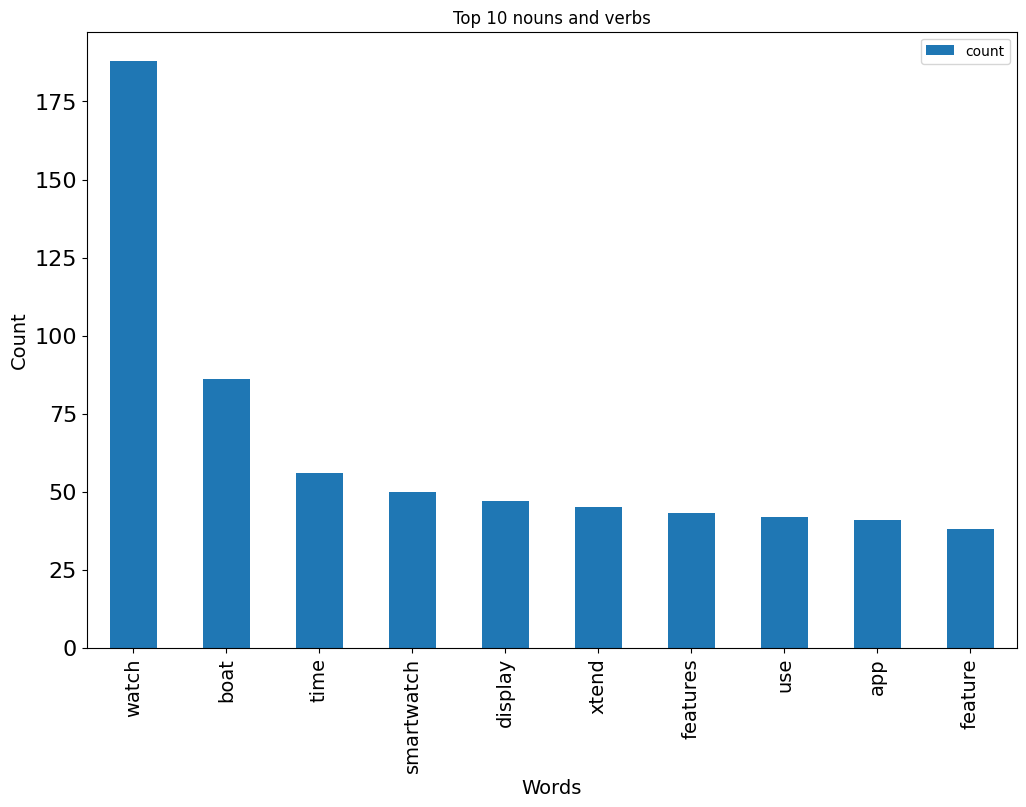

In [87]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## 9. Feature Extraction

### A. BOW Features

In [88]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

### B. TF-IDF Features

In [89]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

## 10. Fetch sentiments Using TextBlob

In [90]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [91]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,102
neg,5


###  Let's calculate subjectivity and Polarity

In [92]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,using smart watch first time. model xtend boat...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, ., model, x...",0.625833,0.262560
1,smart (model boat extend plus) watch functioni...,this smart (model boat extend plus) watch func...,"[smart, (, model, boat, extend, plus, ), watch...",0.426768,0.279221
2,"good ,nice worth money, super product","very good ,nice worth money, super product","[good, ,, nice, worth, money, ,, super, product]",0.591667,0.483333
3,"easy operate,good looks,good design,light weig...","easy operate,good looks,good design,light weig...","[easy, operate, ,, good, looks, ,, good, desig...",0.833333,0.433333
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...,"[skipping, parts, mostly, covered, reviews, sp...",0.431746,-0.003823


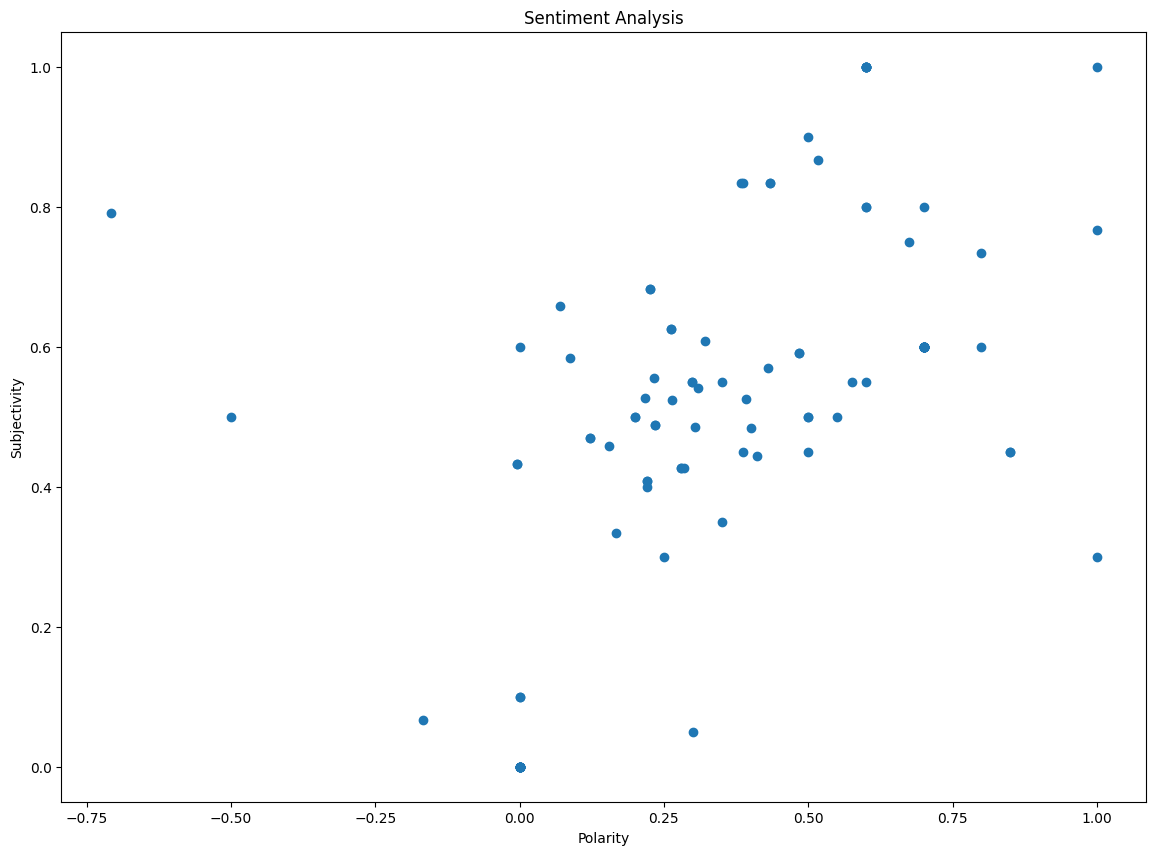

In [93]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [94]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,using smart watch first time. model xtend boat...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, ., model, x...",0.625833,0.262560,pos
1,smart (model boat extend plus) watch functioni...,this smart (model boat extend plus) watch func...,"[smart, (, model, boat, extend, plus, ), watch...",0.426768,0.279221,pos
2,"good ,nice worth money, super product","very good ,nice worth money, super product","[good, ,, nice, worth, money, ,, super, product]",0.591667,0.483333,pos
3,"easy operate,good looks,good design,light weig...","easy operate,good looks,good design,light weig...","[easy, operate, ,, good, looks, ,, good, desig...",0.833333,0.433333,pos
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...,"[skipping, parts, mostly, covered, reviews, sp...",0.431746,-0.003823,neg


## 11. Story Generation and Visualization

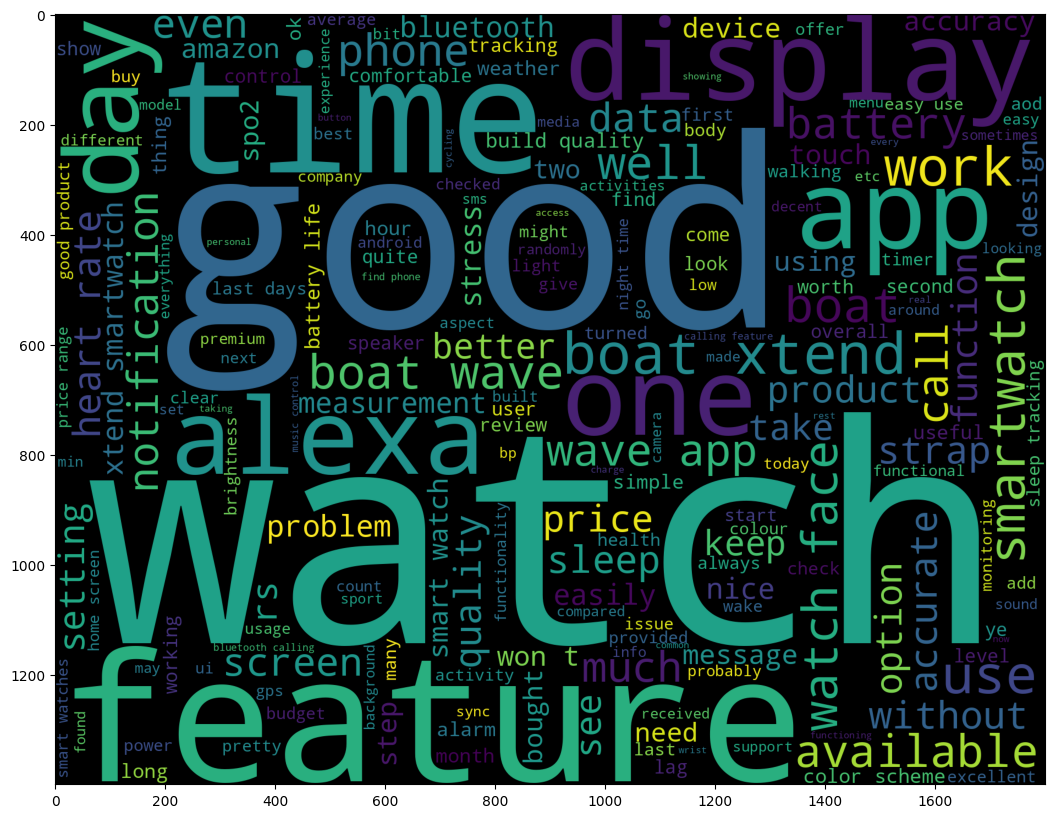

In [95]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

### A. Most common words in positive Review

In [96]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

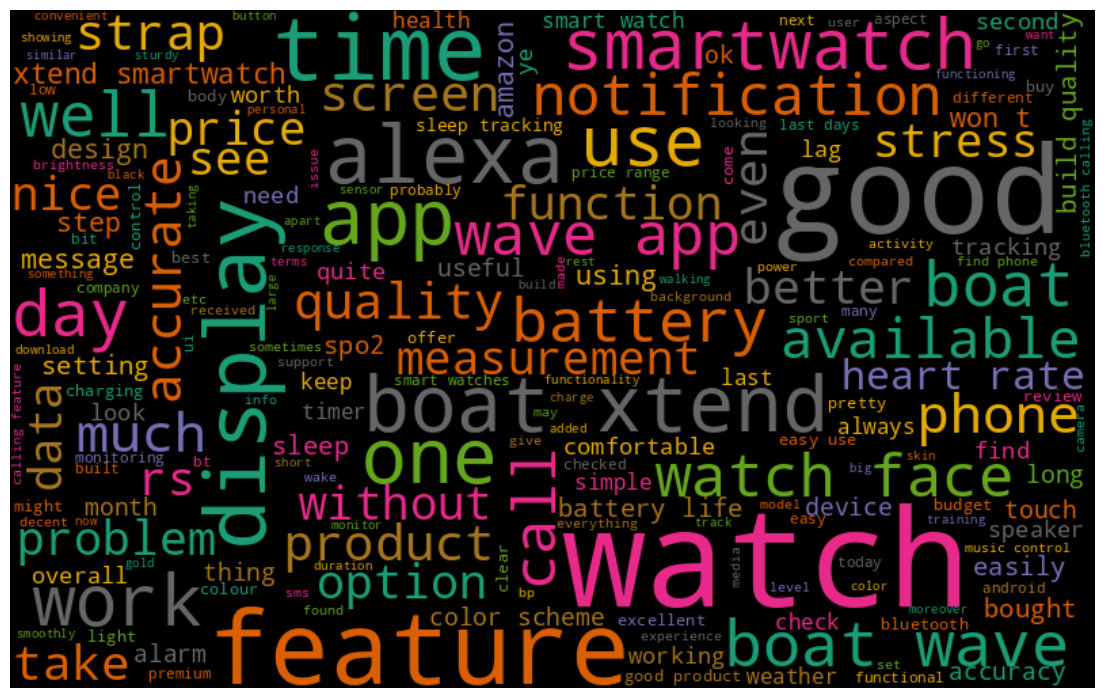

In [97]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### B. Most common words in negative Review

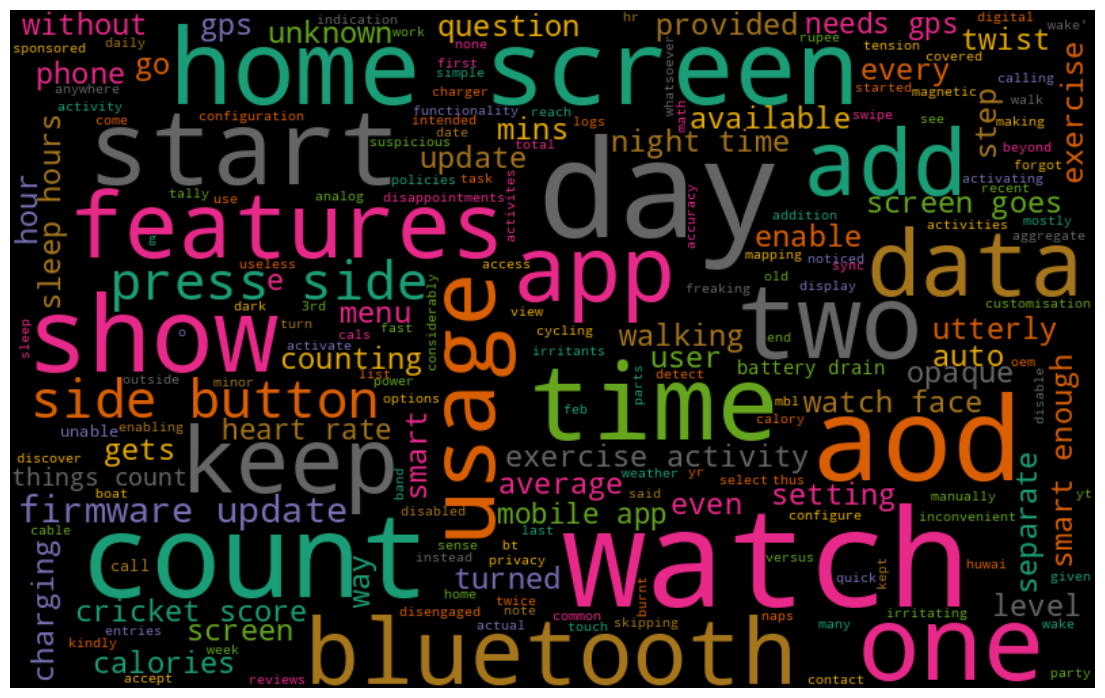

In [98]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)

# THE END